## Random variable distributions

In [17]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#1.Get the numerical variables from our dataset.

In [8]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
data.shape

(9134, 24)

In [12]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))
data.columns = cols
print(data.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [63]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [64]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [ ]:
data=data.drop(columns=['number_of_open_complaints']) #number of complaint column dropped since it appears as numerical however it has categorical features

In [66]:
df = pd.DataFrame(data)

In [67]:
df_nums = df._get_numeric_data()
df_nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,2,198.234764
9130,3096.511217,21604,79,14,28,1,379.200000
9131,8163.890428,0,85,9,37,2,790.784983
9132,7524.442436,21941,96,34,3,3,691.200000


In [68]:
#2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.The variables 

In [ ]:
#Most of the plots are right skewed

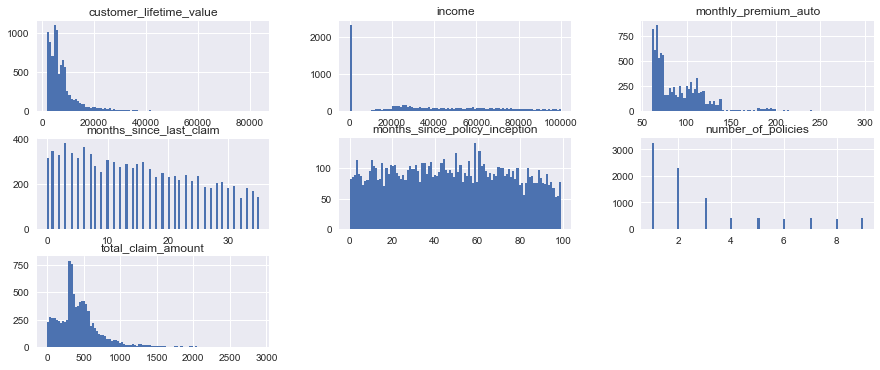

In [69]:
df_nums.hist(bins=100, figsize=(15, 6), layout=(3, 3));

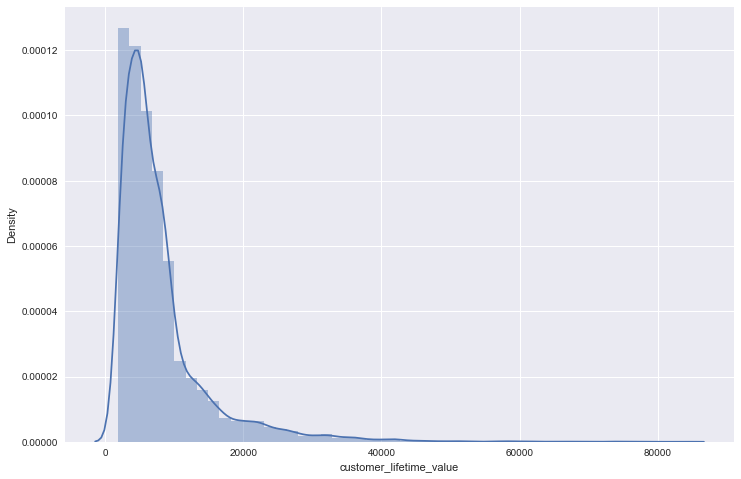

In [70]:
sns.distplot(df_nums['customer_lifetime_value'])
plt.show()


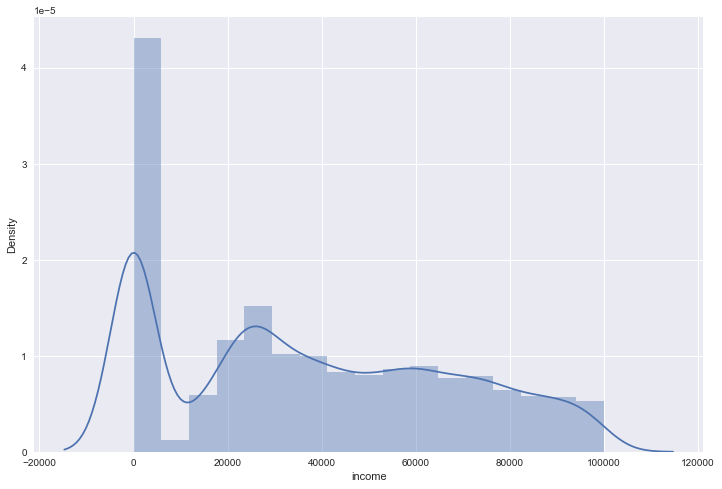

In [84]:
sns.distplot(df_nums['income'])
plt.show()


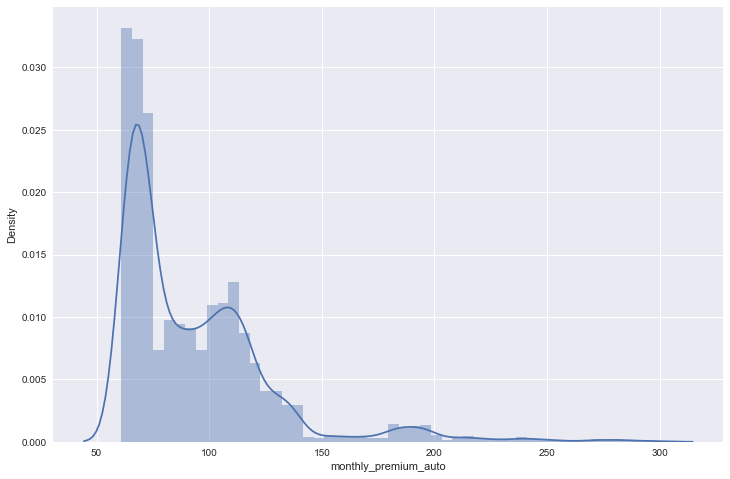

In [85]:
sns.distplot(df_nums['monthly_premium_auto'])
plt.show()

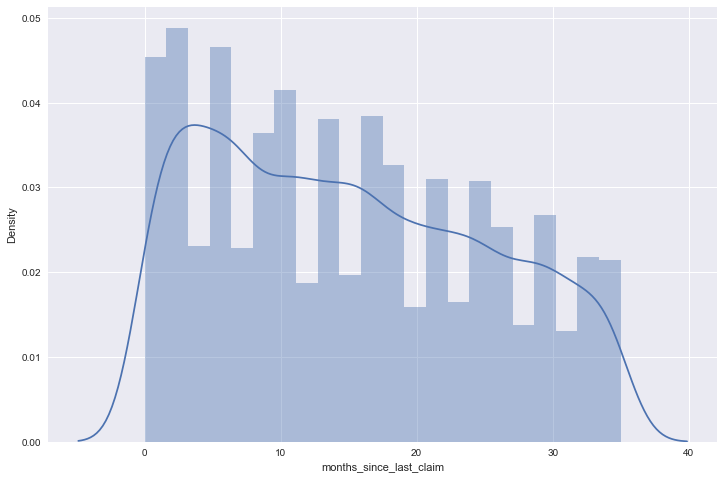

In [86]:
sns.distplot(df_nums['months_since_last_claim'])
plt.show()

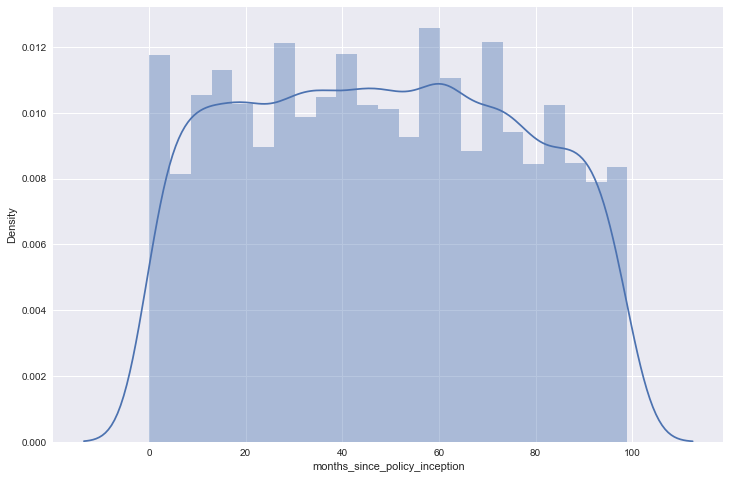

In [87]:
sns.distplot(df_nums['months_since_policy_inception'])
plt.show()

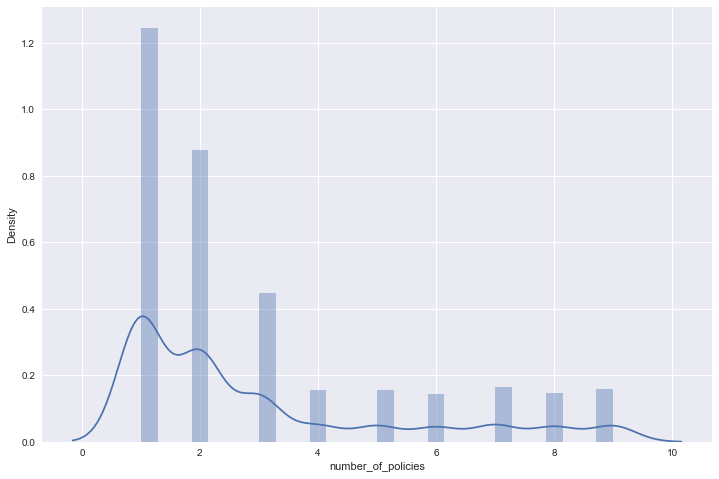

In [88]:
sns.distplot(df_nums['number_of_policies']) 
plt.show()

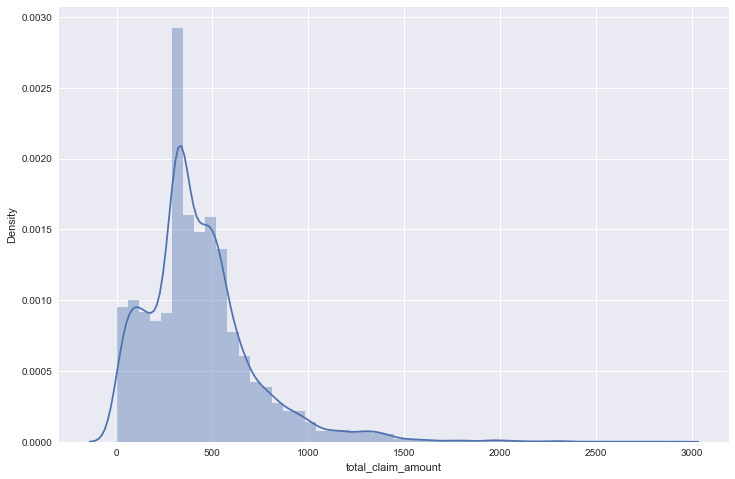

In [89]:
sns.distplot(df_nums['total_claim_amount'])
plt.show()

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [91]:
#3.Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [92]:
# replot customer_lifetime_value
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr

In [93]:
data_regr = df_nums[(data['customer_lifetime_value']>lower_limit) & (df_nums['customer_lifetime_value']<upper_limit)]

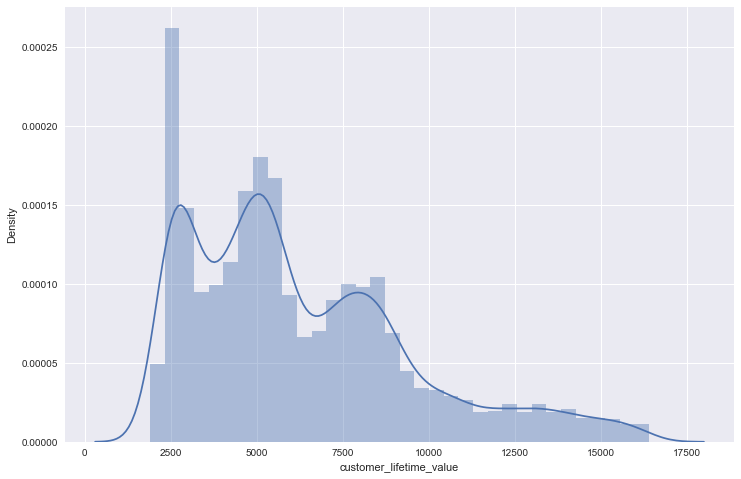

In [94]:
sns.distplot(data_regr['customer_lifetime_value'])
plt.show()

In [95]:
# replot monthly_premium_auto
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)
upper_limit = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr

In [96]:
data_regr = df_nums[(data['monthly_premium_auto']>lower_limit) & (df_nums['monthly_premium_auto']<upper_limit)]

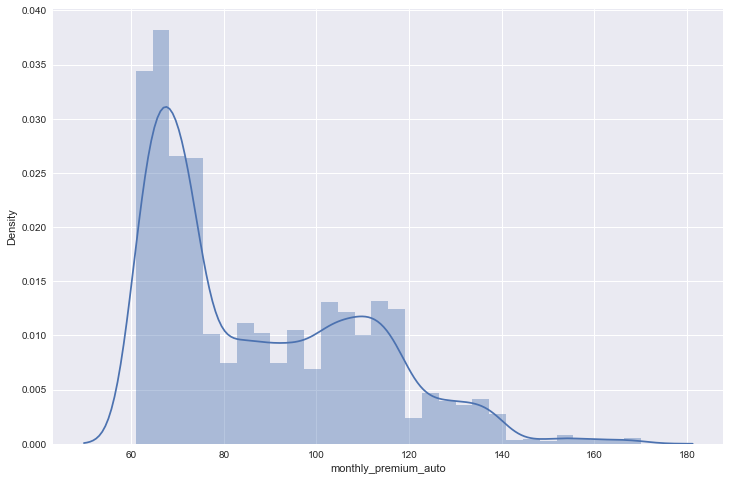

In [97]:
sns.distplot(data_regr['monthly_premium_auto'])
plt.show()

In [100]:
#number_of_policies

iqr = np.percentile(data['number_of_policies'],75) - np.percentile(data['number_of_policies'],25)
upper_limit = np.percentile(data['number_of_policies'],75) + 1.5*iqr
lower_limit = np.percentile(data['number_of_policies'],25) - 1.5*iqr

In [101]:
data_regr = df_nums[(data['number_of_policies']>lower_limit) & (df_nums['number_of_policies']<upper_limit)]

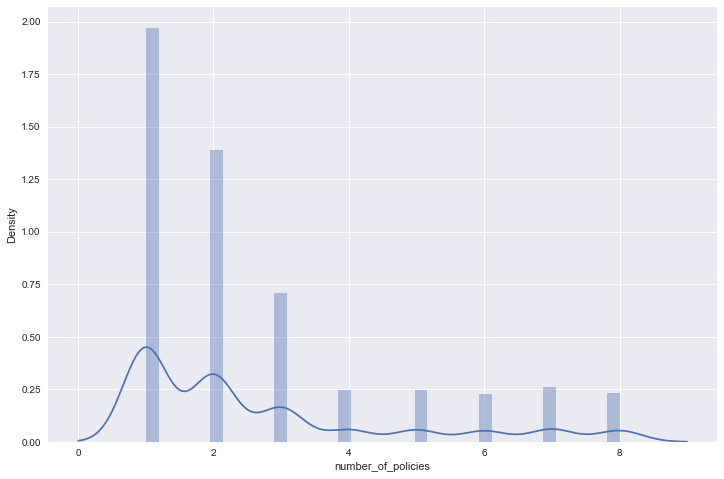

In [102]:
# replot monthly_premium_auto
sns.distplot(data_regr['number_of_policies'])
plt.show()

In [103]:
#total_claim_amount

In [104]:
iqr = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25)
upper_limit = np.percentile(data['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(data['total_claim_amount'],25) - 1.5*iqr

In [105]:
data_regr = df_nums[(data['total_claim_amount']>lower_limit) & (df_nums['total_claim_amount']<upper_limit)]

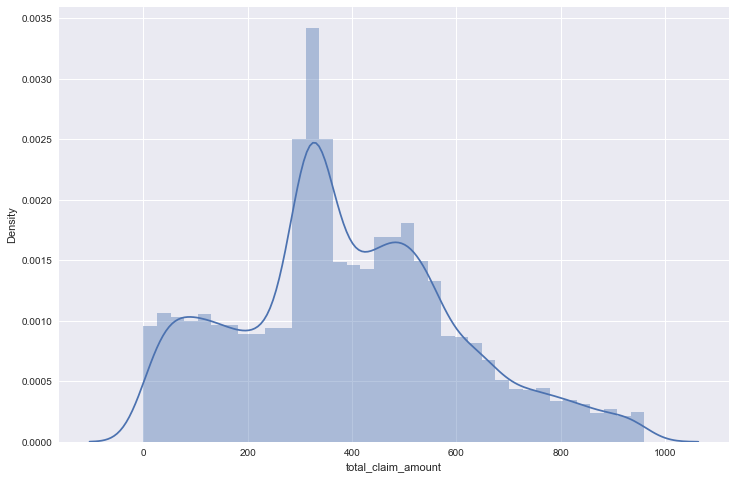

In [106]:
sns.distplot(data_regr['total_claim_amount'])
plt.show()